In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
%matplotlib notebook

## Define unit cells

In [3]:
thetas = np.array([0,1,2,3,4])/5*2*np.pi
e = np.array([[np.cos(x),np.sin(x)] for x in thetas])
l_c = 5.22
l_a = 4.54
phi = (1+np.sqrt(5))/2

<IPython.core.display.Javascript object>


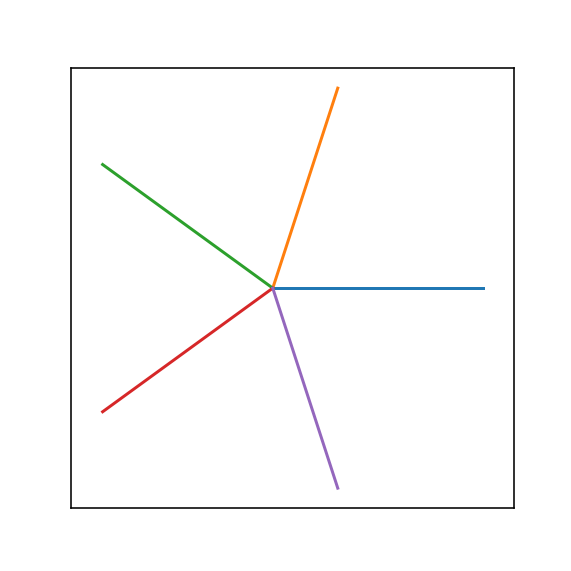

In [4]:
fig,ax = plt.subplots(1,1, figsize=[4, 4])
ax.axis('equal')

for i in range(len(thetas)):
    ax.plot([0,e[i,0]],[0,e[i,1]])

ax.set_xticks([])
ax.set_yticks([])
plt.show()

### Equilateral hexagon unit cell (H)

In [5]:
index_edges = [0,1,3]
edges_H = e[index_edges]

# place atoms
# red sites
cH_red = []
for i_z in range(3):
    f_edge_r = np.array([[0,0,0],[1,0,0],[0,1,0],[1,0,-1],[0,1,-1],[1,1,-1]])
    c_xy = np.array([edges_H.T@f for f in f_edge_r])*l_a
    c_z = np.ones([len(f_edge_r),1])*i_z*l_c/2
    c = np.hstack((c_xy,c_z))
    cH_red.append(c)
cH_red = np.array(cH_red)
cH_red = cH_red.reshape([3*len(f_edge_r),3])

# blue sites
# layer 0
f_edge_b0 = np.array([[0,0,-1/phi],[1,1/phi,0],[1/phi,1,0],[1,1,-1+1/phi]])
c_xy = np.array([edges_H.T@f for f in f_edge_b0])*l_a
c_z = np.ones([len(f_edge_b0),1])*l_c/4
c_b0 = np.hstack((c_xy,c_z))
# layer 1
f_edge_b1 = np.array([[1,1,0],[0,0,-1]])
c_xy = np.array([edges_H.T@f for f in f_edge_b1])*l_a
c_z = np.ones([len(f_edge_b1),1])*l_c/4*3
c_b1 = np.hstack((c_xy,c_z))
cH_blu = np.vstack((c_b0,c_b1))

# yellow sites
# layer 0
f_edge_y0 = np.array([[0.5,0,0],[0,0.5,0],[1,0,-0.5],[0,1,-0.5],[0.5,1,-1],[1,0.5,-1]])
c_xy = np.array([edges_H.T@f for f in f_edge_y0])*l_a
c_z = np.ones([len(f_edge_y0),1])*l_c/4*3
cH_ylw = np.hstack((c_xy,c_z))

<IPython.core.display.Javascript object>


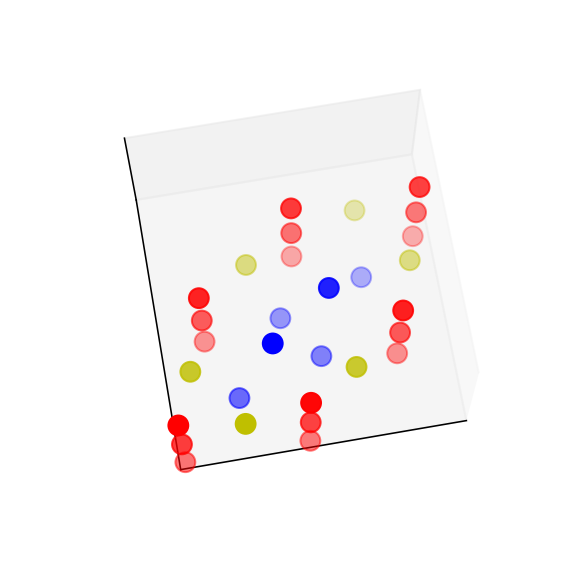

In [6]:
fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([10,10,6])
ax.view_init(elev=72, azim=-100)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(cH_red[:,0],cH_red[:,1],cH_red[:,2],
           marker='o',c='r',s=100)
ax.scatter(cH_blu[:,0],cH_blu[:,1],cH_blu[:,2],
           marker='o',c='b',s=100)
ax.scatter(cH_ylw[:,0],cH_ylw[:,1],cH_ylw[:,2],
           marker='o',c='y',s=100)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,6)
plt.show()

### Rhombus unit cell (R)

In [7]:
index_edges = [0,1]
edges_R = e[index_edges]

# place atoms
# red sites
cR_red = []
for i_z in range(3):
    f_edge_r = np.array([[0,0],[1,0],[0,1],[1,1]])
    c_xy = np.array([edges_R.T@f for f in f_edge_r])*l_a
    c_z = np.ones([len(f_edge_r),1])*i_z*l_c/2
    c = np.hstack((c_xy,c_z))
    cR_red.append(c)
cR_red = np.array(cR_red)
cR_red = cR_red.reshape([3*len(f_edge_r),3])

# blue sites
# layer 0
f_edge_b0 = np.array([[1/phi,1/phi]])
c_xy = np.array([edges_R.T@f for f in f_edge_b0])*l_a
c_z = np.ones([len(f_edge_b0),1])*l_c/4
c_b0 = np.hstack((c_xy,c_z))
# layer 1
f_edge_b1 = np.array([[1-1/phi,1-1/phi]])
c_xy = np.array([edges_R.T@f for f in f_edge_b1])*l_a
c_z = np.ones([len(f_edge_b1),1])*l_c/4*3
c_b1 = np.hstack((c_xy,c_z))
cR_blu = np.vstack((c_b0,c_b1))

# yellow sites
# layer 0
f_edge_y0 = np.array([[0,0.5],[0.5,0]])
c_xy = np.array([edges_R.T@f for f in f_edge_y0])*l_a
c_z = np.ones([len(f_edge_y0),1])*l_c/4
c_y0 = np.hstack((c_xy,c_z))
# layer 1
f_edge_y1 = np.array([[1,0.5],[0.5,1]])
c_xy = np.array([edges_R.T@f for f in f_edge_y1])*l_a
c_z = np.ones([len(f_edge_y1),1])*l_c/4*3
c_y1 = np.hstack((c_xy,c_z))
cR_ylw = np.vstack((c_y0,c_y1))

<IPython.core.display.Javascript object>


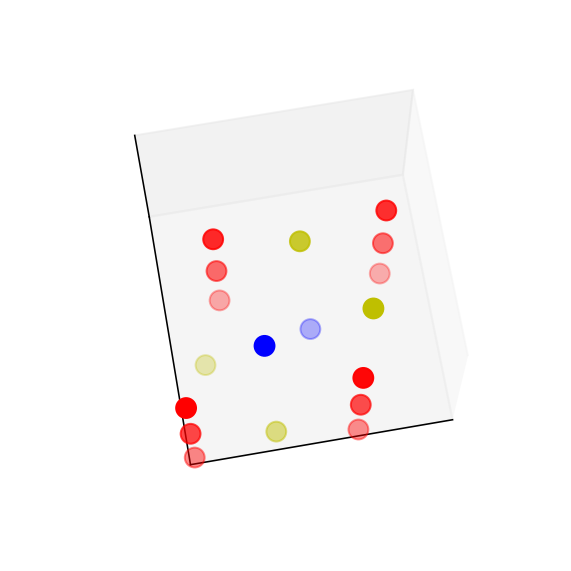

In [8]:
fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([7,7,6])
ax.view_init(elev=72, azim=-100)
# ax.view_init(elev=58.2825, azim=-90)
# ax.axis('equal')

ax.scatter(cR_red[:,0],cR_red[:,1],cR_red[:,2],
           marker='o',c='r',s=100)
ax.scatter(cR_blu[:,0],cR_blu[:,1],cR_blu[:,2],
           marker='o',c='b',s=100)
ax.scatter(cR_ylw[:,0],cR_ylw[:,1],cR_ylw[:,2],
           marker='o',c='y',s=100)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim(0,7)
ax.set_ylim(0,7)
ax.set_zlim(0,6)
plt.show()

## Create LAMMPS dump file

In [9]:
def Create_dump(c,filename):
    n_type = len(c)
    n_particles = np.sum([len(coord) for coord in c])
    
    x_max = np.max([max(coord[:,0]) for coord in c])
    x_min = np.min([min(coord[:,0]) for coord in c])
    y_max = np.max([max(coord[:,1]) for coord in c])
    y_min = np.min([min(coord[:,1]) for coord in c])
    z_max = np.max([max(coord[:,2]) for coord in c])
    z_min = np.min([min(coord[:,2]) for coord in c])
    
    with open(filename, 'w') as f:
        p_id = 0
        f.write('ITEM: TIMESTEP\n')
        f.write('{:d}\n'.format(0))
        f.write('ITEM: NUMBER OF ATOMS\n')
        f.write('{:d}\n'.format(n_particles))
        f.write('ITEM: BOX BOUNDS f f f\n')
        f.write('{} {}\n'.format(x_min, x_max))
        f.write('{} {}\n'.format(y_min, y_max))
        f.write('{} {}\n'.format(z_min, z_max))
        f.write('ITEM: ATOMS id type xu yu zu \n')
        for i_type in range(n_type):
            for i_p, coord in enumerate(c[i_type]):
                p_id+=1
                f.write('{:d} {:d} {} {} {}\n'.format(p_id, i_type, coord[0], coord[1], coord[2],))

In [10]:
# Equilateral hexagon unit cell
cH = [cH_red,cH_blu,cH_ylw]
filename_cH = './cH.dump'
Create_dump(cH,filename_cH)

# Rhombus unitcell
cR = [cR_red,cR_blu,cR_ylw]
filename_cR = './cR.dump'
Create_dump(cR,filename_cR)